<a href="https://colab.research.google.com/github/Sahil-Chhabra-09/Auto-Correct-in-NLP/blob/main/Auto_Correct_in_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Implementing auto correct based on
1. Probability
2. Minimum Edit Distance

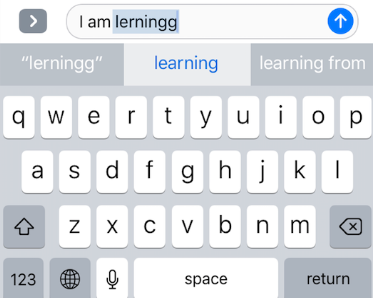

## Data Preprocessing

In [93]:
import re
from collections import Counter
import numpy as np
import pandas as pd

In [94]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [95]:
def process_data(file_name):
    """
    Input: 
        A file_name which is found in your current directory. You just have to read it in. 
    Output: 
        words: a list containing all the words in the corpus (text file you read) in lower case. 
    """
    words = []

    
    with open(file_name, 'r') as file:
        lower_case_text = file.read().lower()
    # convert all letters to lower case
    #Convert every word to lower case and return them in a list.
    words = re.findall(r'\w+', lower_case_text)
    
    return words

In [96]:
word_l = process_data('/content/shakespeare.txt')
vocab = set(word_l)       # generating vocabulary based on shakespeare's playwright
print(f"The first ten words in the text are: \n{word_l[0:10]}")
print(f"There are {len(vocab)} unique words in the vocabulary.")

The first ten words in the text are: 
['o', 'for', 'a', 'muse', 'of', 'fire', 'that', 'would', 'ascend', 'the']
There are 6116 unique words in the vocabulary.


### Getting Count

In [97]:
def get_count(word_l):
    '''
    Input:
        word_l: a set of words representing the corpus. 
    Output:
        word_count_dict: The wordcount dictionary where key is the word and value is its frequency.
    '''
    
    word_count_dict = {}
    for word in word_l:
        word_count_dict[word] = word_count_dict.get(word, 0) + 1
        
    return word_count_dict

In [98]:
word_count_dict = get_count(word_l)
print(f"There are {len(word_count_dict)} key values pairs")
print(f"The count for the word 'thee' is {word_count_dict.get('thee',0)}")

There are 6116 key values pairs
The count for the word 'thee' is 240


### Getting Probabilities

In [99]:
def get_probs(word_count_dict):
    '''
    Input:
        word_count_dict: The wordcount dictionary where key is the word and value is its frequency.
    Output:
        probs: A dictionary where keys are the words and the values are the probability that a word will occur. 
    '''
    M = sum(word_count_dict.values())
    probs = {}
    for word, count in word_count_dict.items():
        probs[word] = count/M
    # get the total count of words for all words in the dictionary
    return probs

In [100]:
probs = get_probs(word_count_dict)
print(f"Length of probs is {len(probs)}")
print(f"P('thee') is {probs['thee']:.4f}")

Length of probs is 6116
P('thee') is 0.0045


## String Manipulations

In [101]:
def delete_letter(word, verbose=False):
    '''
    Input:
        word: the string/word for which you will generate all possible words 
                in the vocabulary which have 1 missing character
    Output:
        delete_l: a list of all possible strings obtained by deleting 1 character from word
    '''
    
    delete_l = []
    split_l = []
    
    split_l = [(word[:i],word[i:])for i in range(len(word)+1)]
    delete_l = [L+R[1:] for L,R in split_l if R]
    

    if verbose: print(f"input word {word}, \nsplit_l = {split_l}, \ndelete_l = {delete_l}")

    return  delete_l

In [102]:
delete_word_l = delete_letter(word="cans",verbose=True)

input word cans, 
split_l = [('', 'cans'), ('c', 'ans'), ('ca', 'ns'), ('can', 's'), ('cans', '')], 
delete_l = ['ans', 'cns', 'cas', 'can']


In [103]:
def switch_letter(word, verbose=False):
    '''
    Input:
        word: input string
     Output:
        switches: a list of all possible strings with one adjacent charater switched
    ''' 
    
    switch_l = []
    split_l = [(word[:i], word[i:]) for i in range(len(word)+1)]
    
    
    switch_l = [L+R[1]+R[0]+R[2:] for L,R in split_l if len(R)>=2]
    
    
    if verbose: print(f"Input word = {word} \nsplit_l = {split_l} \nswitch_l = {switch_l}") 
    
    return switch_l

In [104]:
switch_word_l = switch_letter(word="eta",verbose=True)

Input word = eta 
split_l = [('', 'eta'), ('e', 'ta'), ('et', 'a'), ('eta', '')] 
switch_l = ['tea', 'eat']


In [105]:
def replace_letter(word, verbose=False):
    '''
    Input:
        word: the input string/word 
    Output:
        replaces: a list of all possible strings where we replaced one letter from the original word. 
    ''' 
    
    letters = 'abcdefghijklmnopqrstuvwxyz'
    replace_l = []
    split_l = []
    
    split_l=[(word[:i],word[i:]) for i in range(len(word)+1)]
    replace_set=[i+c+j[1:] for i,j in split_l if j!='' for c in letters]    
    replace_set=set(replace_set)
    replace_set.discard(word)
    
    
    replace_l = sorted(list(replace_set))
    
    if verbose: print(f"Input word = {word} \nsplit_l = {split_l} \nreplace_l {replace_l}")   
    
    return replace_l

In [106]:
replace_l = replace_letter(word='can',verbose=True)

Input word = can 
split_l = [('', 'can'), ('c', 'an'), ('ca', 'n'), ('can', '')] 
replace_l ['aan', 'ban', 'caa', 'cab', 'cac', 'cad', 'cae', 'caf', 'cag', 'cah', 'cai', 'caj', 'cak', 'cal', 'cam', 'cao', 'cap', 'caq', 'car', 'cas', 'cat', 'cau', 'cav', 'caw', 'cax', 'cay', 'caz', 'cbn', 'ccn', 'cdn', 'cen', 'cfn', 'cgn', 'chn', 'cin', 'cjn', 'ckn', 'cln', 'cmn', 'cnn', 'con', 'cpn', 'cqn', 'crn', 'csn', 'ctn', 'cun', 'cvn', 'cwn', 'cxn', 'cyn', 'czn', 'dan', 'ean', 'fan', 'gan', 'han', 'ian', 'jan', 'kan', 'lan', 'man', 'nan', 'oan', 'pan', 'qan', 'ran', 'san', 'tan', 'uan', 'van', 'wan', 'xan', 'yan', 'zan']


In [107]:
def insert_letter(word, verbose=False):
    '''
    Input:
        word: the input string/word 
    Output:
        inserts: a set of all possible strings with one new letter inserted at every offset
    ''' 
    letters = 'abcdefghijklmnopqrstuvwxyz'
    
    split_l = [(word[:i], word[i:]) for i in range(len(word)+1)]
    
    
    insert_l = [L+letter+R for L,R in split_l for letter in letters]
    
    
    if verbose: print(f"Input word {word} \nsplit_l = {split_l} \ninsert_l = {insert_l}")
    
    return insert_l

In [108]:
insert_l = insert_letter('at', True)
print(f"Number of strings output by insert_letter('at') is {len(insert_l)}")

Input word at 
split_l = [('', 'at'), ('a', 't'), ('at', '')] 
insert_l = ['aat', 'bat', 'cat', 'dat', 'eat', 'fat', 'gat', 'hat', 'iat', 'jat', 'kat', 'lat', 'mat', 'nat', 'oat', 'pat', 'qat', 'rat', 'sat', 'tat', 'uat', 'vat', 'wat', 'xat', 'yat', 'zat', 'aat', 'abt', 'act', 'adt', 'aet', 'aft', 'agt', 'aht', 'ait', 'ajt', 'akt', 'alt', 'amt', 'ant', 'aot', 'apt', 'aqt', 'art', 'ast', 'att', 'aut', 'avt', 'awt', 'axt', 'ayt', 'azt', 'ata', 'atb', 'atc', 'atd', 'ate', 'atf', 'atg', 'ath', 'ati', 'atj', 'atk', 'atl', 'atm', 'atn', 'ato', 'atp', 'atq', 'atr', 'ats', 'att', 'atu', 'atv', 'atw', 'atx', 'aty', 'atz']
Number of strings output by insert_letter('at') is 78


## Combining the Edits

In [109]:
def edit_one_letter(word, allow_switches = True):
    """
    Input:
        word: the string/word for which we will generate all possible wordsthat are one edit away.
    Output:
        edit_one_set: a set of words with one possible edit. Please return a set. and not a list.
    """
    
    edit_one_set = set()
    
    
    if(allow_switches):
        edit_one_set = insert_letter(word)+replace_letter(word)+switch_letter(word)+delete_letter(word)
    else:
        edit_one_set = insert_letter(word)+replace_letter(word)+delete_letter(word)
    
    
    return set(edit_one_set)

In [110]:
tmp_word = "at"
tmp_edit_one_set = edit_one_letter(tmp_word)
tmp_edit_one_l = sorted(list(tmp_edit_one_set))

print(f"input word {tmp_word} \nedit_one_l \n{tmp_edit_one_l}\n")
print(f"The type of the returned object should be a set {type(tmp_edit_one_set)}")
print(f"Number of outputs from edit_one_letter('at') is {len(edit_one_letter('at'))}")

input word at 
edit_one_l 
['a', 'aa', 'aat', 'ab', 'abt', 'ac', 'act', 'ad', 'adt', 'ae', 'aet', 'af', 'aft', 'ag', 'agt', 'ah', 'aht', 'ai', 'ait', 'aj', 'ajt', 'ak', 'akt', 'al', 'alt', 'am', 'amt', 'an', 'ant', 'ao', 'aot', 'ap', 'apt', 'aq', 'aqt', 'ar', 'art', 'as', 'ast', 'ata', 'atb', 'atc', 'atd', 'ate', 'atf', 'atg', 'ath', 'ati', 'atj', 'atk', 'atl', 'atm', 'atn', 'ato', 'atp', 'atq', 'atr', 'ats', 'att', 'atu', 'atv', 'atw', 'atx', 'aty', 'atz', 'au', 'aut', 'av', 'avt', 'aw', 'awt', 'ax', 'axt', 'ay', 'ayt', 'az', 'azt', 'bat', 'bt', 'cat', 'ct', 'dat', 'dt', 'eat', 'et', 'fat', 'ft', 'gat', 'gt', 'hat', 'ht', 'iat', 'it', 'jat', 'jt', 'kat', 'kt', 'lat', 'lt', 'mat', 'mt', 'nat', 'nt', 'oat', 'ot', 'pat', 'pt', 'qat', 'qt', 'rat', 'rt', 'sat', 'st', 't', 'ta', 'tat', 'tt', 'uat', 'ut', 'vat', 'vt', 'wat', 'wt', 'xat', 'xt', 'yat', 'yt', 'zat', 'zt']

The type of the returned object should be a set <class 'set'>
Number of outputs from edit_one_letter('at') is 129


In [111]:
def edit_two_letters(word, allow_switches = True):
    '''
    Input:
        word: the input string/word 
    Output:
        edit_two_set: a set of strings with all possible two edits
    '''
    
    edit_two_set = set()
    
    
    for i in edit_one_letter(word, allow_switches):
        edit_two_set = edit_two_set | edit_one_letter(i, allow_switches)
    # | = union
    
    return set(edit_two_set)

In [112]:
tmp_edit_two_set = edit_two_letters("a")
tmp_edit_two_l = sorted(list(tmp_edit_two_set))
print(f"Number of strings with edit distance of two: {len(tmp_edit_two_l)}")
print(f"First 10 strings {tmp_edit_two_l[:10]}")
print(f"Last 10 strings {tmp_edit_two_l[-10:]}")
print(f"The data type of the returned object should be a set {type(tmp_edit_two_set)}")
print(f"Number of strings that are 2 edit distances from 'at' is {len(edit_two_letters('at'))}")

Number of strings with edit distance of two: 2654
First 10 strings ['', 'a', 'aa', 'aaa', 'aab', 'aac', 'aad', 'aae', 'aaf', 'aag']
Last 10 strings ['zv', 'zva', 'zw', 'zwa', 'zx', 'zxa', 'zy', 'zya', 'zz', 'zza']
The data type of the returned object should be a set <class 'set'>
Number of strings that are 2 edit distances from 'at' is 7154


## Suggestions based on probabilities

This is when we have some text which has repeating words. If we just have vocabulary of english words, then probability of each word will be same.

This is useful when generation of suggestions follow context, otherwise, we use minimum edit distance

In [113]:
def get_corrections(word, probs, vocab, n=2, verbose = False):
    '''
    Input: 
        word: a user entered string to check for suggestions
        probs: a dictionary that maps each word to its probability in the corpus
        vocab: a set containing all the vocabulary
        n: number of possible word corrections you want returned in the dictionary
    Output: 
        n_best: a list of tuples with the most probable n corrected words and their probabilities.
    '''
    
    suggestions = []
    n_best = []
    
    if word in vocab:
        suggestions.append(word)
       
    suggestions = list(edit_one_letter(word).intersection(vocab) or edit_two_letters(word).intersection(vocab))
                    
    # sorting in descending order
    idx_topn = np.argsort([-probs[x] for x in suggestions])[:n]
    
    for i in range(n):
        n_best.append([suggestions[idx_topn[i]], probs[suggestions[idx_topn[i]]]])
    
    suggestions = list(np.array(n_best)[:,0])
    
    
    if verbose: print("entered word = ", word, "\nsuggestions = ", suggestions)

    return n_best

In [114]:
my_word = 'dys' 
tmp_corrections = get_corrections(my_word, probs, vocab, 2, verbose=True) # keep verbose=True
for i, word_prob in enumerate(tmp_corrections):
    print(f"word {i}: {word_prob[0]}, probability {word_prob[1]:.6f}")

print(f"data type of corrections {type(tmp_corrections)}")

entered word =  dys 
suggestions =  ['days', 'dye']
word 0: days, probability 0.000410
word 1: dye, probability 0.000019
data type of corrections <class 'list'>


## Getting Suggestions based on Minimum Edit Distance

### Implementing Minimum Edit Distance

In [115]:
def min_edit_distance(source, target, ins_cost = 1, del_cost = 1, rep_cost = 2):
    '''
    Input: 
        source: a string corresponding to the string you are starting with
        target: a string corresponding to the string you want to end with
        ins_cost: an integer setting the insert cost
        del_cost: an integer setting the delete cost
        rep_cost: an integer setting the replace cost
    Output:
        D: a matrix of len(source)+1 by len(target)+1 containing minimum edit distances
        med: the minimum edit distance (med) required to convert the source string to the target
    '''
    m = len(source) 
    n = len(target) 
    #initializing cost matrix with zeros and dimensions (m+1,n+1) 
    D = np.zeros((m+1, n+1), dtype=int) 
    
    
    for row in range(1,m+1):
        D[row,0] = D[row-1,0] + del_cost
        

    for col in range(1,n+1):
        D[0,col] = D[0,col-1] + ins_cost
        
    for row in range(1,m+1):
        
        for col in range(1,n+1):
            
            r_cost = rep_cost
            
            if source[row-1]==target[col-1]:
                r_cost = 0
            D[row,col] = min(D[row-1,col-1]+r_cost, D[row-1,col]+del_cost, D[row,col-1]+ins_cost)
            
    med = D[row,col]
    
    return D,med

In [116]:
source =  'play'
target = 'stay'
matrix, min_edits = min_edit_distance(source, target)
print("minimum edits: ",min_edits, "\n")
idx = list('#' + source)
cols = list('#' + target)
df = pd.DataFrame(matrix, index=idx, columns= cols)
print(df)

minimum edits:  4 

   #  s  t  a  y
#  0  1  2  3  4
p  1  2  3  4  5
l  2  3  4  5  6
a  3  4  5  4  5
y  4  5  6  5  4


### Getting Suggestions

In [117]:
def get_corrections_med(word, vocab, n=2, verbose = False):
    '''
    Input: 
        word: a user entered string to check for suggestions
        probs: a dictionary that maps each word to its probability in the corpus
        vocab: a set containing all the vocabulary
        n: number of possible word corrections you want returned in the dictionary
    Output: 
        n_best: a list of tuples with the most probable n corrected words and their probabilities.
    '''
    
    suggestions = []
    n_best = []
       
    suggestions = list(edit_one_letter(word).intersection(vocab) or edit_two_letters(word).intersection(vocab))
                
    if word in vocab:
      suggestions.append(word)
                    
    idx_topn = np.argsort([min_edit_distance(word, x)[1] for x in suggestions])[:n]

    
    for i in range(n):
        n_best.append([suggestions[idx_topn[i]], min_edit_distance(word, suggestions[idx_topn[i]])[1]])
    
    suggestions = list(np.array(n_best)[:,0])
    
    
    if verbose: print("entered word = ", word, "\nsuggestions = ", suggestions)

    return n_best

In [118]:
my_word = 'dys' 
tmp_corrections = get_corrections_med(my_word, vocab, 2, verbose=True)

for i, med in enumerate(tmp_corrections):
    print(f"word {i}: {med[0]}, med {med[1]:.6f}")

entered word =  dys 
suggestions =  ['days', 'dye']
word 0: days, med 1.000000
word 1: dye, med 2.000000


In [119]:
get_corrections_med("heo", vocab, 2, True)

entered word =  heo 
suggestions =  ['he', 'ho']


[['he', 1], ['ho', 1]]

### Correction based on 3000 basic english words

In [120]:
english_vocab = set(process_data("/content/englishvocab.txt"))

In [121]:
get_corrections_med("heo", english_vocab, 2, True)

entered word =  heo 
suggestions =  ['he', 'hero']


[['he', 1], ['hero', 1]]

In [122]:
get_corrections_med("spouse", english_vocab, 2, True)

entered word =  spouse 
suggestions =  ['pose', 'pause']


[['pose', 2], ['pause', 3]]